#  By Prince Kumar
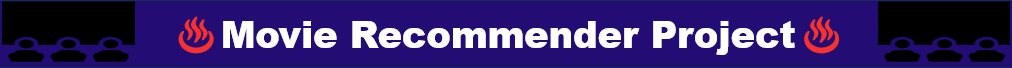

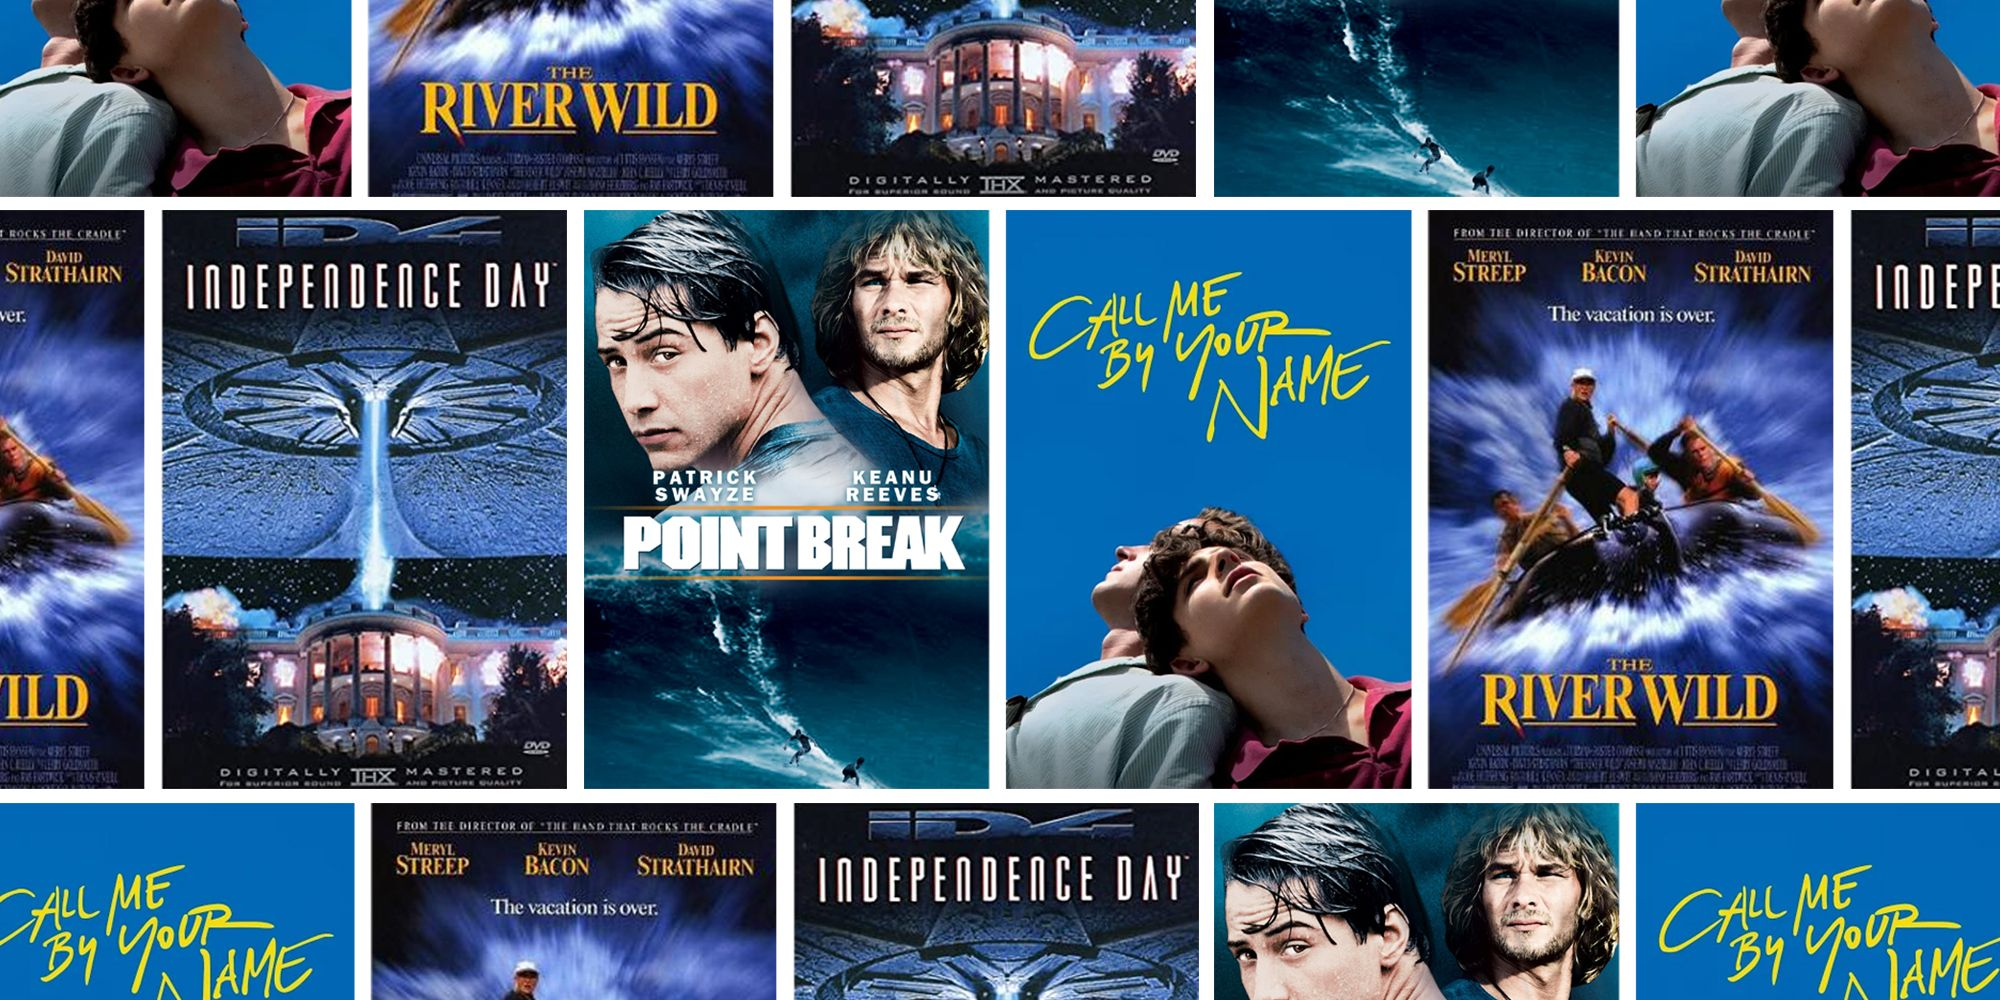

# What are Recommender Systems ? 
A recommendation system (or recommender system) is a class of machine learning that uses data to help predict, narrow down, and find what people are looking for among an exponentially growing number of options.

A recommendation system is an artificial intelligence or AI algorithm, usually associated with machine learning, that uses Big Data to suggest or recommend additional products to consumers. These can be based on various criteria, including past purchases, search history, demographic information, and other factors. Recommender systems are highly useful as they help users discover products and services they might otherwise have not found on their own.

## Type of Recommender Systems

### 1. Content based System
A Content-Based Recommender works by the data that we take from the user, either explicitly (rating) or implicitly (clicking on a link). By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.



### 2. Collabrative filter base System
Collaborative filtering algorithms recommend items (this is the filtering part) based on preference information from many users (this is the collaborative part). This approach uses similarity of user preference behavior,  given previous interactions between users and items, recommender algorithms learn to predict future interaction.


### 3. Hybrid  Recommender System
Hybrid recommender systems combine the advantages of the types above to create a more comprehensive recommending system.

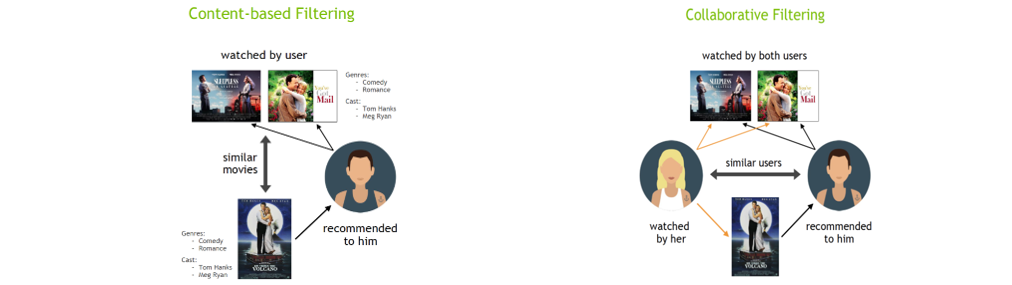

# Projects Goals
1. Preprocessing
2. Build Model
3. Website
4. Deploy


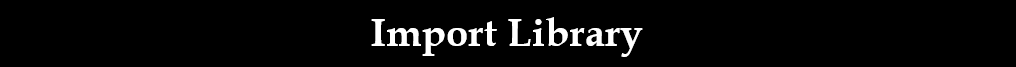

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from ast import literal_eval

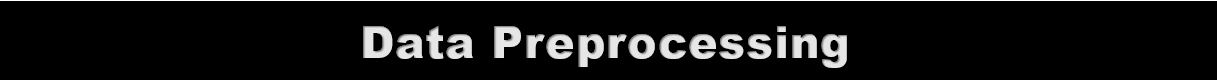

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credit=pd.read_csv('tmdb_5000_credits.csv')

* 1. What is TMDB ?
* It is database of the Movie

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# There is 4803 rows and 20 columns in this data.
movies.shape

(4803, 20)

In [7]:
# checking Duplicates values
movies.duplicated().sum()

0

In [8]:
# Looking the information of the movies dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
# checking the statistical Values
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
# Cheaking the Shape of the credit dataset
credit.shape

(4803, 4)

In [10]:
# Checking the dupicate value
credit.duplicated().sum()

0

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
credit.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


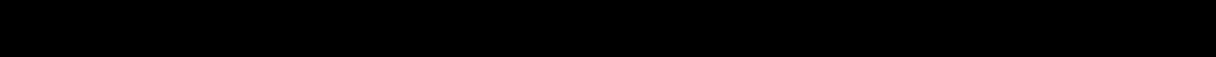 
## Now i am going join the movie and credit Dataset with merge function in pandas



In [15]:
movie=movies.merge(credit,on="title")

In [16]:
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [19]:
print("-"*120)
print(f" There is {movie.shape[1]} Number of Rows and {movie.shape[0]} Number columns in this dataset")
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
 There is 23 Number of Rows and 4809 Number columns in this dataset
------------------------------------------------------------------------------------------------------------------------


In [35]:
print("-"*120)
na=movie.isna().sum().reset_index().rename(columns={"index":"Headres",0:"Null_values"}).sort_values("Null_values",ascending=False)
na

------------------------------------------------------------------------------------------------------------------------


,Headres,Null_values
2,homepage,3096
16,tagline,844
7,overview,3
13,runtime,2
11,release_date,1
21,cast,0
20,movie_id,0
19,vote_count,0
18,vote_average,0
17,title,0


 ### In this dataset in few Null values in few columns

In [38]:
print("-"*120)
print("-"*120)
movie.info()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-nul

In [40]:
movie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


### For Movie Recomendation we need few Columns that's help me to predict the similar movie.


In [41]:
# I will keep this Columns. 
# genres
# id
# keyword
# title
# overview
# release_date
# cast
# crew :- in director
# 

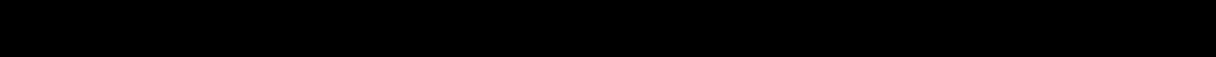

In [43]:
df=movie[["movie_id","title","genres","keywords","overview","cast","crew"]]

In [44]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   genres    4809 non-null   object
 3   keywords  4809 non-null   object
 4   overview  4806 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [46]:
df.isna().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [49]:
# We three Null values in overview so i am going to drop the columns
df.dropna(inplace=True)

In [50]:
df.isna().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df['genres'][0]


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

### Here we have to extract the Genres of the Movie that show in Dictionary

In [53]:
#'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, 
# {"id": 878, "name": "Science Fiction"}]'

In [54]:
def convert(obj):
    lis=[]
    for i in literal_eval(obj):
        lis.append(i['name'])
    return lis

In [55]:
# i Have extracted the genres from this columns Done.
df["genres"]=df["genres"].apply(convert)

In [56]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [57]:
df["keywords"][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [58]:
df["keywords"]=df["keywords"].apply(convert)

In [59]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [60]:
 df.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

### Here i Need Top Three Charactors from in this Columns

In [61]:
def convert_name(obj):
    L=[]
    count=0
    for i in literal_eval(obj):
        if count!=3:
            L.append(i['name'])
            count+=1
        else:
            break
    return L

In [62]:
df.cast=df.cast.apply(convert_name)

In [63]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [64]:
df.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [65]:
#Here we have extract the Name of the charactor

In [66]:
# def fetch_director(obj):
#     L=[]
#     for i in literal_eval(obj):
#         if i["job"]=="Director":
#             L.append(i["name"])
#             break
#     return L  
def fetch_director(text):
    L = []
    for i in literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [67]:
df.crew=df.crew.apply(fetch_director)

In [68]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [69]:
# Now we have replace the space charactor Name in this data

In [70]:
df['cast']=df['cast'].apply(lambda x:[i.replace(" ","") for i in x])

# OR 

In [71]:
#we can do like that

In [72]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [73]:
#movies['cast'] = movies['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)

In [74]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [75]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [76]:
# Now i am going to create a tage columns where i will join genres keywords overview cast and crew

In [77]:
df["Tags"]=df['genres'] + df['keywords'] + df['overview'] + df['cast'] + df['crew']

In [78]:
df.head()

,movie_id,title,genres,keywords,overview,cast,crew,Tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction, basedonnov..."


In [79]:
# Now we have to work with the Movie_id ,title and Tags columns
# so Extracting the columns from the dataset

In [80]:
movie=df[["movie_id","title","Tags"]]

In [81]:
movie.head()

,movie_id,title,Tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, basedonnov..."


In [82]:
# Now we have to convert the tags columns from list to strings
# so its very simple.

In [83]:
movie['Tags']=movie['Tags'].apply(lambda x:" ".join(x)) # its converted to strings

In [84]:
movie.head()

,movie_id,title,Tags
0,19995,Avatar,Action Adventure Fantasy ScienceFiction cultur...
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drugabuse exoti...
2,206647,Spectre,Action Adventure Crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller dccomics crimefigh...
4,49529,John Carter,Action Adventure ScienceFiction basedonnovel m...


In [85]:
# Here you can see that All details converted in strings
# its looks like Movie Description 
movie.Tags[0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [86]:
# Here i am going to convert the each columns in Lower Charactor in this details columns
movie['Tags']=movie["Tags"].apply(lambda x:x.lower())

In [87]:
movie.head()

,movie_id,title,Tags
0,19995,Avatar,action adventure fantasy sciencefiction cultur...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drugabuse exoti...
2,206647,Spectre,action adventure crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,action crime drama thriller dccomics crimefigh...
4,49529,John Carter,action adventure sciencefiction basedonnovel m...


In [88]:
# Natural Language Toolkit
from nltk.stem.porter import PorterStemmer

In [89]:
# Creating the Object of the PorterStemmer
ps=PorterStemmer()
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
    return " ".join(L)

In [90]:
stem("lover loving loving")

'lover love love'

In [91]:
# in stemming root word are few changes from the our english words like example given Below

In [92]:
stem("'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'")

"'action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. samworthington zoesaldana sigourneyweav jamescameron'"

In [93]:
# Here you can see that {"advanture":advantur,"ScienceFiction":"sciencefict","future":futur}
#so that's few changes in stemming so dont'worry about that

In [94]:
movie['Tags']=movie['Tags'].apply(stem)

In [95]:
movie.head()

,movie_id,title,Tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...


In [96]:
# Here i am going to import countvectorization from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
# creating the objects of the CountVectoizer
cv=CountVectorizer(max_features=5000,stop_words="english")

In [98]:
vectors=cv.fit_transform(movie['Tags']).toarray()

In [99]:
vectors.shape

(4806, 5000)

In [100]:
vectors[0:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [102]:
cv.get_feature_names_out() #How mucch words taken from the columns

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [103]:
len(cv.get_stop_words())# this words ignoring the countvectorizer

318

In [104]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# we have to find the simmilarity vector with the help of the cosine distance 

## what is cosine Distancce ?
* its find the distance between to vector of angle distancce in Degree.
###  OR
* Cosine similarity says that to find the similarity between two points or vectors we need to find Angle between them.
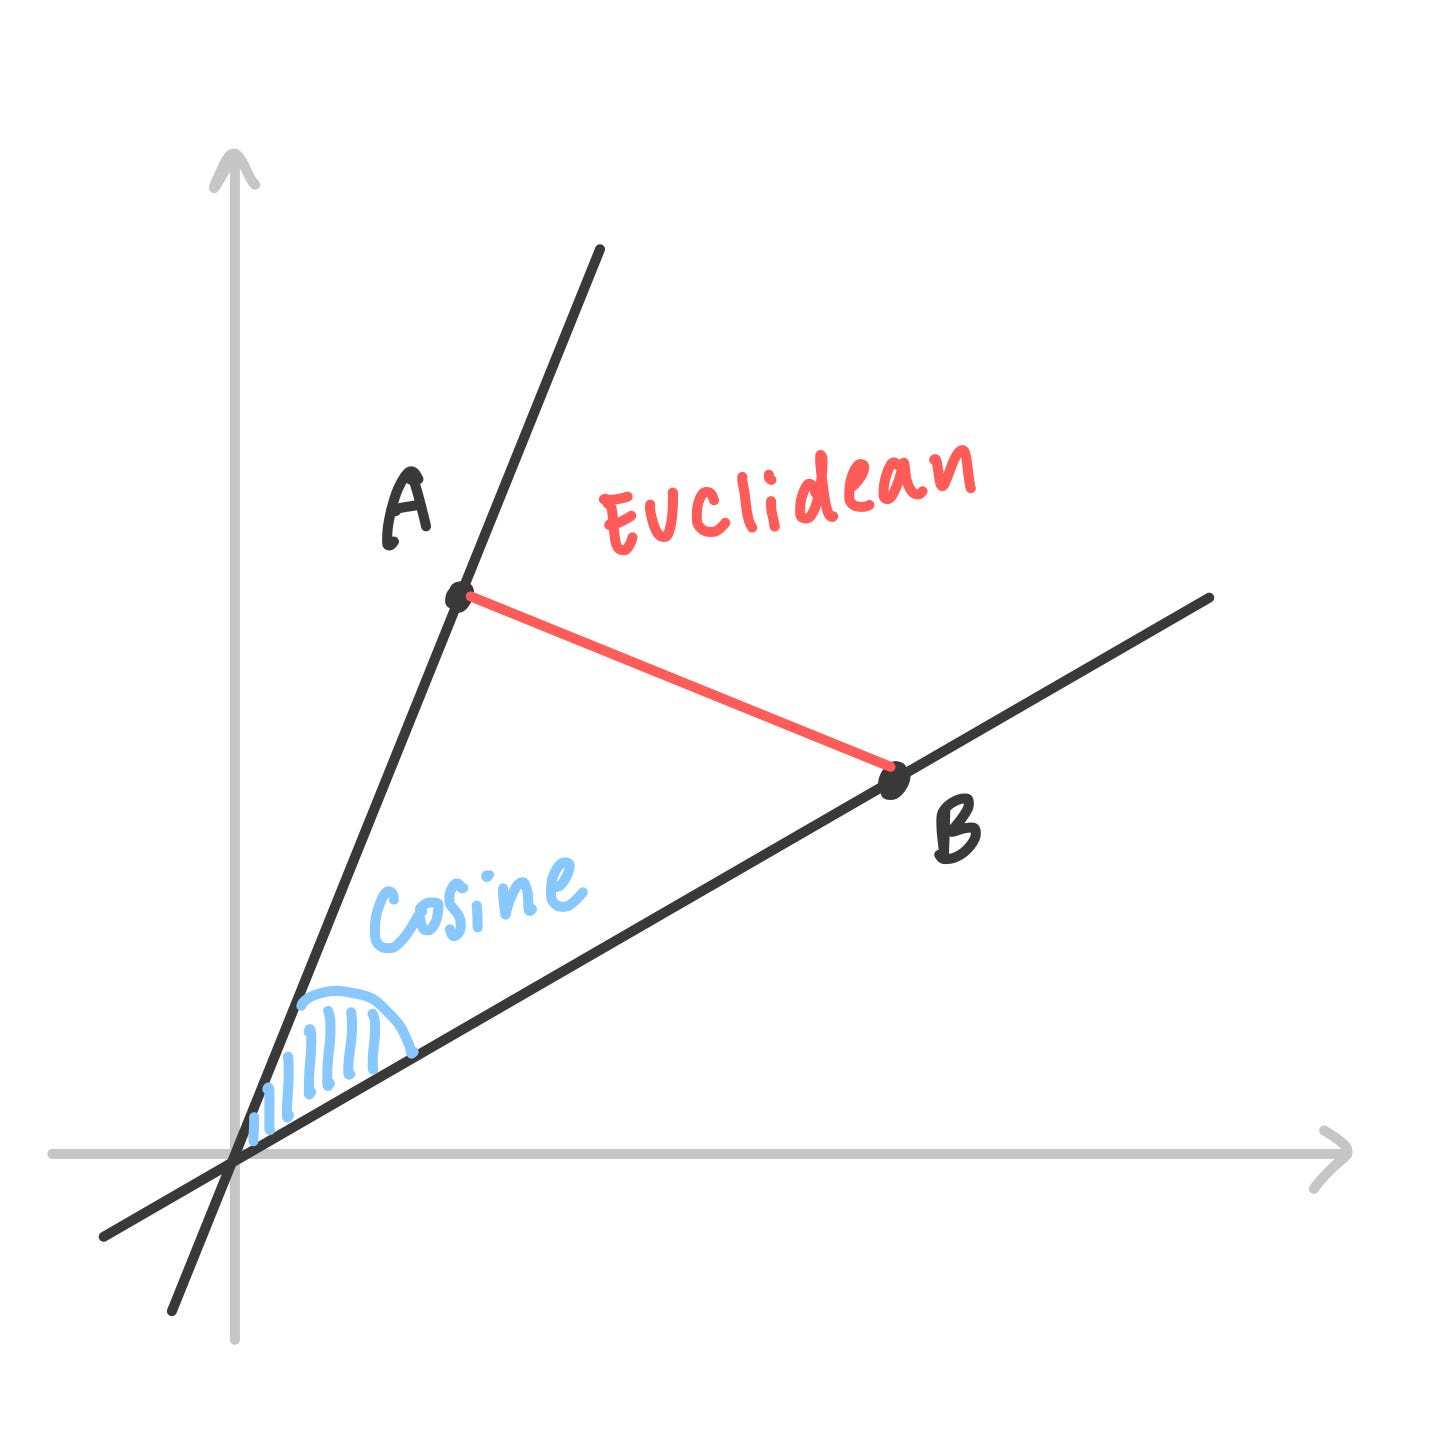

### we have to find the distance each movie to all other momvie.
* Note :- Here we can't find the Ecludien distance i will use cosine distance.


## Rule of the Cosine Distance :-
1. The higher the distance ,the lower the similarity
2. THe Lower the distancce , the Higher the Similarity

In [105]:
# importing the library of cosine from sklearn.metrics
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
 cosine=cosine_similarity(vectors)

In [107]:
cosine.shape

(4806, 4806)

In [108]:
# One Movie comapring the similarity from all other Movie
cosine[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [109]:
# One Movie comapring the similarity from all other Movie
cosine[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [110]:
# sorting the each array because it will show simmilar Movie 
sorted(cosine[0])[-1:-6:-1]

[1.0000000000000002,
 0.28676966733820225,
 0.26901379342448517,
 0.2605130246476754,
 0.255608593705383]

In [111]:
movie.head()

,movie_id,title,Tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...


In [112]:
# we have to find the index of the Movie that we need.
movie[movie['title']=="Avatar"].index[0]

0

In [113]:
movie[movie['title']=="John Carter"].index[0]

4

In [114]:
sorted(list(enumerate(cosine[0])),reverse=True,key=lambda x:x[1])[0:6]

[(0, 1.0000000000000002),
 (1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.2503866978335957)]

In [115]:
def recomment(movie_name):
    L=[]
    LL=[]
    movie_index = movie[movie['title']==movie_name].index[0]
    distance=cosine[movie_index]
    movie_list = sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[0:6]
 #   similarity = sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[0:6]
    for i in movie_list:
        m=movie.loc[i[0],"title"]
    #print(f"Most Simmilar Movie of {movie_name} :-")
        #print(m,i[1])
        L.append(m)
        LL.append(i[1])
    print("-"*120)
    print("Your Recommented Movie :-")
    print("-"*120)
    return pd.DataFrame({"Reccomented_Movie":L,"Simmierity_score":LL})
    

### Here our Function is ready for reccoment the movie name of the Simmilar Movie that's you want to see.

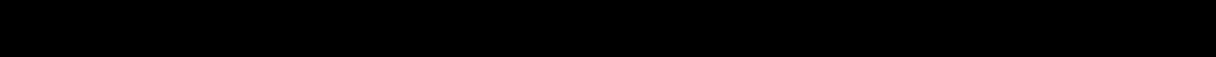

In [116]:

recomment("Avatar")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Avatar,1.000000
1,Aliens vs Predator: Requiem,0.286770
2,Aliens,0.269014
3,Anne of Green Gables,0.260513
4,Independence Day,0.255609
5,Titan A.E.,0.250387


### Here i am sharing the Name of Movie You have to choose the Movie Name and reccoment the Movie Name.

In [80]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [81]:
df[["title"]].sample(50).T

,967,4663,2886,862,61,3741,3401,930,2529,3510,534,4535,3424,4420,143,3445,3601,4074,678,3894,292,2260,4525,4577,4015,2619,4643,358,4455,1593,1541,3104,4730,1294,2620,4768,2992,1135,2593,1414,2860,1934,2856,1054,2926,557,2065,3946,309,528
title,Hereafter,UnDivided,The Great Beauty,Lolita,Jupiter Ascending,The Crying Game,Hard to Be a God,Non-Stop,Private Benjamin,Men of War,Bandits,Hurricane Streets,Bran Nue Dae,ZMD: Zombies of Mass Destruction,Pan,"Good bye, Lenin!",Y Tu Mamá También,Lies in Plain Sight,Dragon Blade,Trainspotting,Eragon,The Children of Huang Shi,To Save A Life,Rise of the Entrepreneur: The Search for a Bet...,A Haunted House,The Importance of Being Earnest,American Desi,Atlantis: The Lost Empire,London to Brighton,The Curse of the Were-Rabbit,Frequency,Shaolin Soccer,Eraserhead,The Time Traveler's Wife,The Love Letter,George Washington,The Mighty Ducks,Red Riding Hood,Killing Them Softly,Closer,Def Jam's How to Be a Player,Straw Dogs,Tales from the Crypt: Demon Knight,Prisoners,Drive Hard,Jarhead,Moliere,Tusk,Son of the Mask,Munich


In [82]:
recomment("The Inkwell")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,The Inkwell,1.000000
1,The Holy Girl,0.342193
2,Dracula 2000,0.311805
3,Seed of Chucky,0.299392
4,Dil Jo Bhi Kahey...,0.299392
5,Krrish,0.297775


In [83]:
recomment("Butterfly")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Butterfly,1.000000
1,Adam Resurrected,0.316875
2,Ulee's Gold,0.283373
3,Flicka,0.251002
4,Dreamer: Inspired By a True Story,0.241967
5,Fear Clinic,0.227928


In [84]:
recomment("Gandhi")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Gandhi,1.000000
1,Albino Alligator,0.289044
2,Taxi to the Dark Side,0.229354
3,Namastey London,0.222780
4,Caravans,0.215206
5,A Passage to India,0.204757


In [85]:
recomment("Avatar")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Avatar,1.000000
1,Aliens vs Predator: Requiem,0.286770
2,Aliens,0.269014
3,Anne of Green Gables,0.260513
4,Independence Day,0.255609
5,Titan A.E.,0.250387


In [86]:
recomment("Ida")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Ida,1.000000
1,"The Good, the Bad and the Ugly",0.418121
2,The Last Time I Committed Suicide,0.369970
3,The Shipping News,0.358057
4,Maria Full of Grace,0.352235
5,Fun Size,0.351432


In [87]:
recomment("The Dark Knight Rises")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,The Dark Knight Rises,1.000000
1,The Dark Knight,0.422561
2,Batman Returns,0.324703
3,Batman,0.320256
4,Batman Forever,0.318158
5,Batman Begins,0.317744


In [88]:
recomment("Avatar")

------------------------------------------------------------------------------------------------------------------------
Your Recommented Movie :-
------------------------------------------------------------------------------------------------------------------------


,Reccomented_Movie,Simmierity_score
0,Avatar,1.000000
1,Aliens vs Predator: Requiem,0.286770
2,Aliens,0.269014
3,Anne of Green Gables,0.260513
4,Independence Day,0.255609
5,Titan A.E.,0.250387


# in sort  Review :-
* This is my Movie Recomender Project with the help of this project you can recoment the similar movie that you want to see.
* In this projects i Have used python tools pandas, numpy, ast
* Sklearn library in i have used sklearn.metrics_paiwise.
* ntlk Natural language toolkit 
* sklearn.feature_extraction in countvectrazation

### What is countvectorizer ?
 CountVectorizer is a great tool provided by the scikit-learn library in Python. 
It is used to transform a given text into a vector on the basis of the frequency (count) 
of each word that occurs in the entire text. This is helpful when we have multiple such texts, 
and we wish to convert each word in each text into vectors (for using in further text analysis).

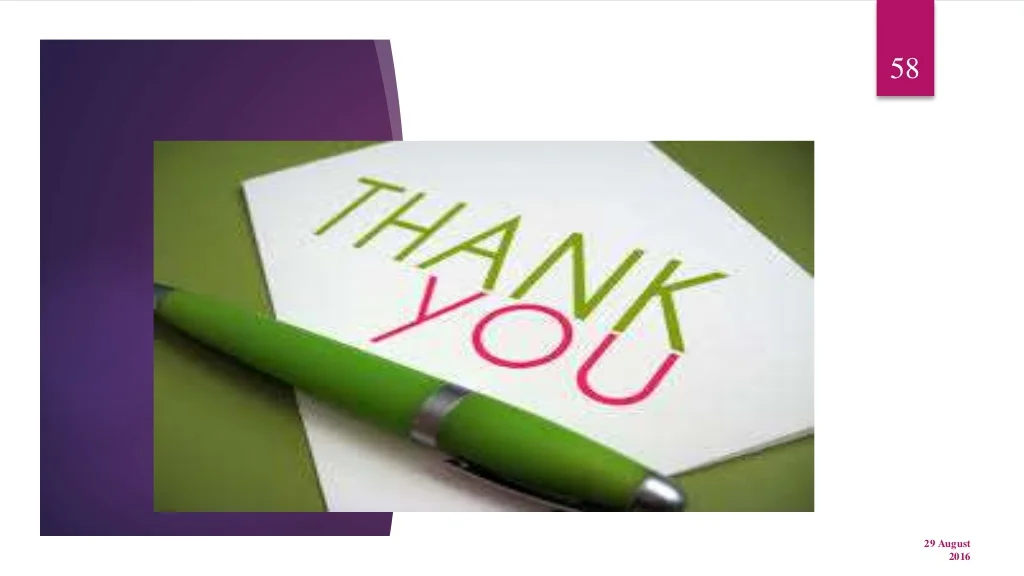

# Done____________________________________________________________